In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
df = pd.read_csv(r'DS1_C5_S5_Hotel Dataset.csv')

In [25]:
# Check column names in the dataset
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [27]:
# For numerical columns, fill missing values with the mean
df['lead_time'] = df['lead_time'].fillna(df['lead_time'].mean())
df['adr'] = df['adr'].fillna(df['adr'].mean())

# For categorical columns, fill missing values with the mode
df['meal'] = df['meal'].fillna(df['meal'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
# Remove duplicate rows
df = df.drop_duplicates()
# Convert 'reservation_status_date' to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Convert 'lead_time' and 'adr' to numeric (if needed)
df['lead_time'] = pd.to_numeric(df['lead_time'], errors='coerce')
df['adr'] = pd.to_numeric(df['adr'], errors='coerce')


C:\Users\nagap\AppData\Local\Temp\ipykernel_1500\1467638440.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')
C:\Users\nagap\AppData\Local\Temp\ipykernel_1500\1467638440.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lead_time'] = pd.to_numeric(df['lead_time'], errors='coerce')
C:\Users\nagap\AppData\Local\Temp\ipykernel_1500\1467638440.py:15: SettingWithCopyWarning: 
A value is trying to be set on a 

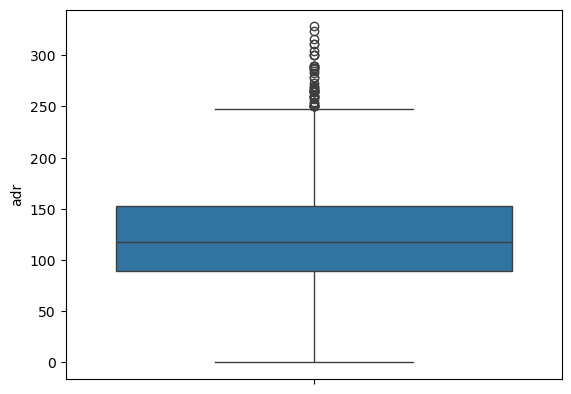

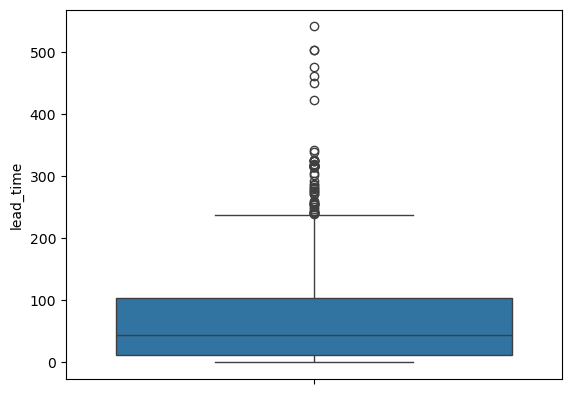

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using a boxplot for 'adr' and 'lead_time'
sns.boxplot(df['adr'])
plt.show()

sns.boxplot(df['lead_time'])
plt.show()


In [31]:
# Task 2 (i)

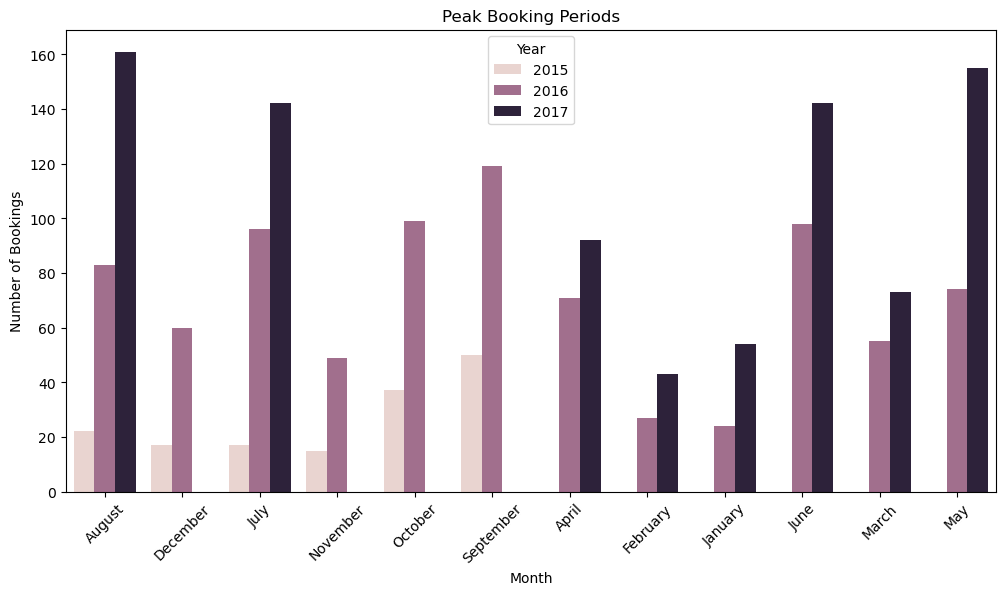

In [33]:
# Group by year and month to count the number of bookings
peak_bookings = df.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='num_bookings')

# Create a bar chart to visualize the peak booking periods
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='arrival_date_month', y='num_bookings', hue='arrival_date_year', data=peak_bookings)
plt.title('Peak Booking Periods')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()


In [35]:
# Task 2(ii)

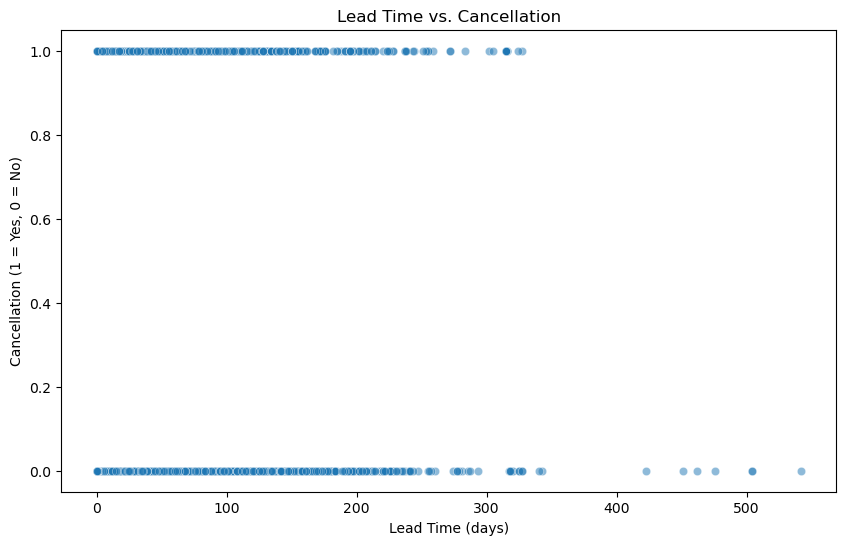

Correlation between lead time and cancellations: 0.17


In [37]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='is_canceled', data=df, alpha=0.5)
plt.title('Lead Time vs. Cancellation')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation (1 = Yes, 0 = No)')
plt.show()

# Calculate the correlation between lead time and cancellations
correlation = df['lead_time'].corr(df['is_canceled'])
print(f'Correlation between lead time and cancellations: {correlation:.2f}')


In [39]:
# Task 2(iii)

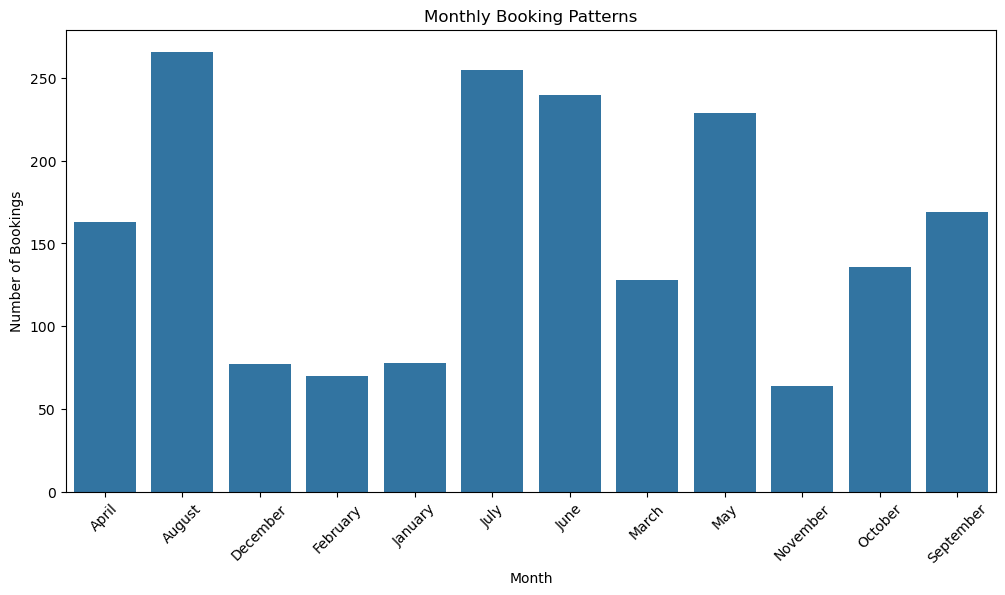

In [41]:
# Count bookings by month
monthly_bookings = df['arrival_date_month'].value_counts().sort_index()

# Create a bar chart for monthly bookings
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values)
plt.title('Monthly Booking Patterns')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


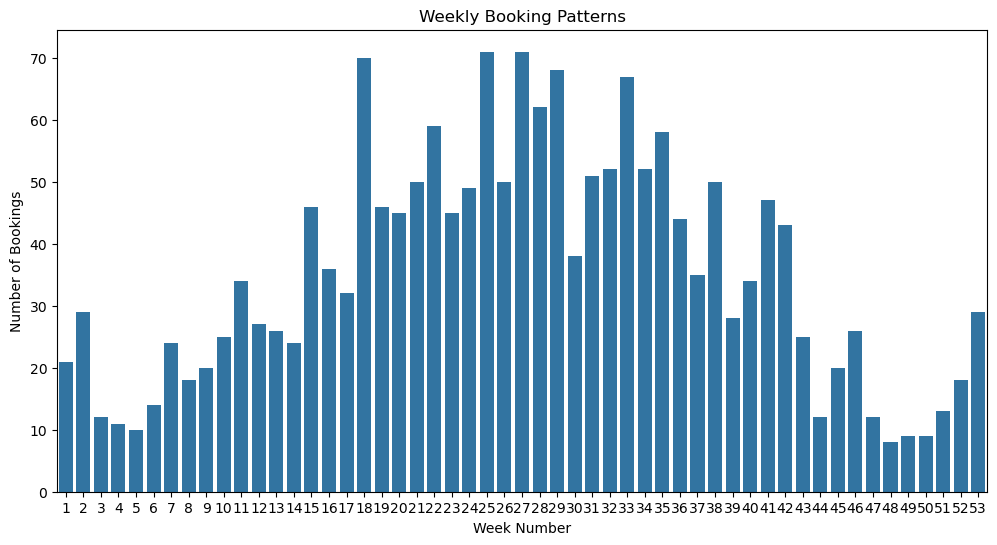

In [43]:
# Count bookings by week number
weekly_bookings = df['arrival_date_week_number'].value_counts().sort_index()

# Create a bar chart for weekly bookings
plt.figure(figsize=(12, 6))
sns.barplot(x=weekly_bookings.index, y=weekly_bookings.values)
plt.title('Weekly Booking Patterns')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.show()


C:\Users\nagap\AppData\Local\Temp\ipykernel_1500\3505422849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype(str)
C:\Users\nagap\AppData\Local\Temp\ipykernel_1500\3505422849.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1)).dt.day_name()


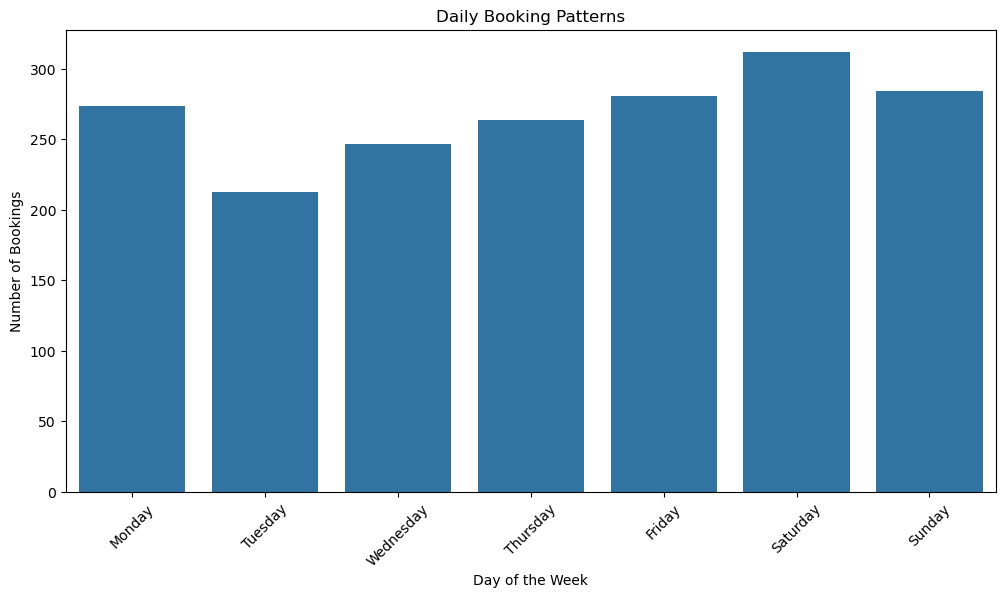

In [45]:
# Convert arrival_date_day_of_month to a categorical type if needed
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype(str)

# Count bookings by day of the week (1 = Monday, 7 = Sunday)
# You may need to create a mapping from day number to day name
df['day_of_week'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1)).dt.day_name()
daily_bookings = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a bar chart for daily bookings
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_bookings.index, y=daily_bookings.values)
plt.title('Daily Booking Patterns')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


In [1]:
# Task 3(i)

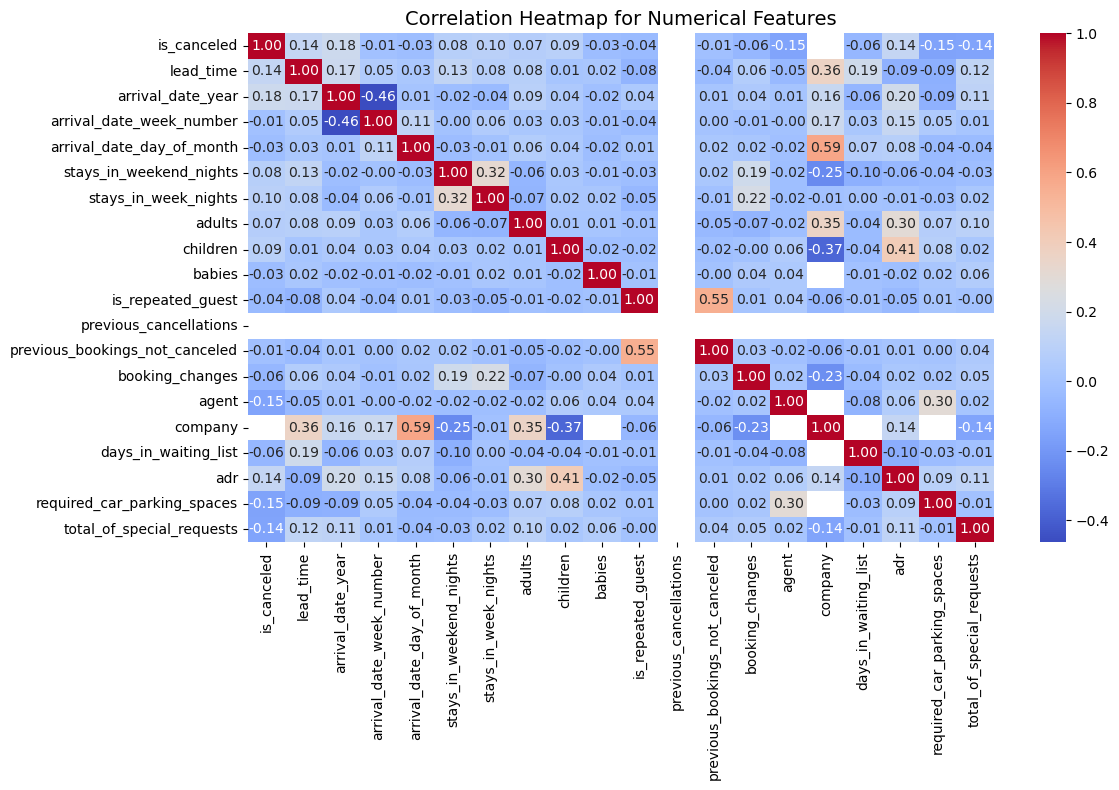

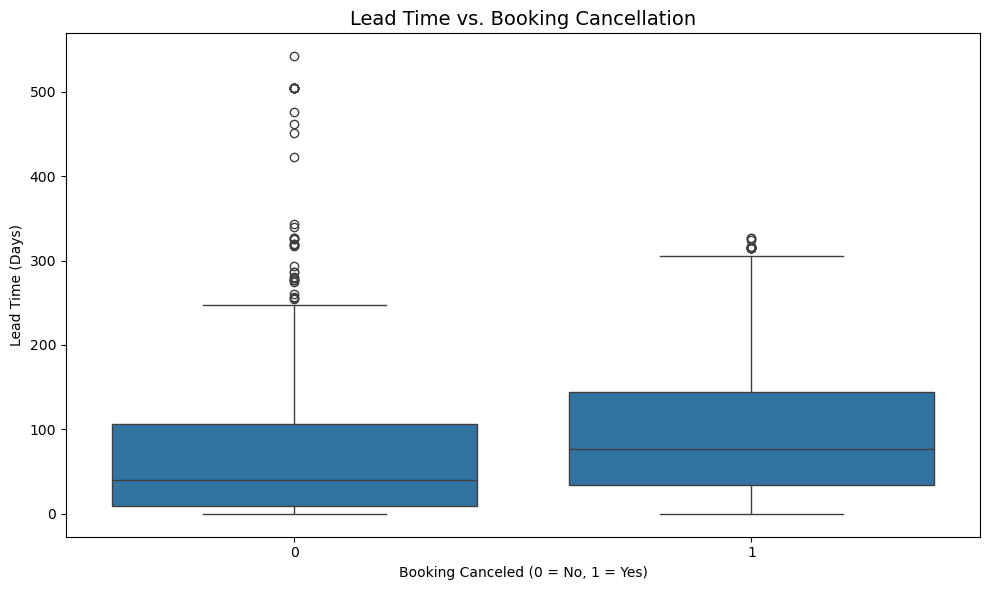

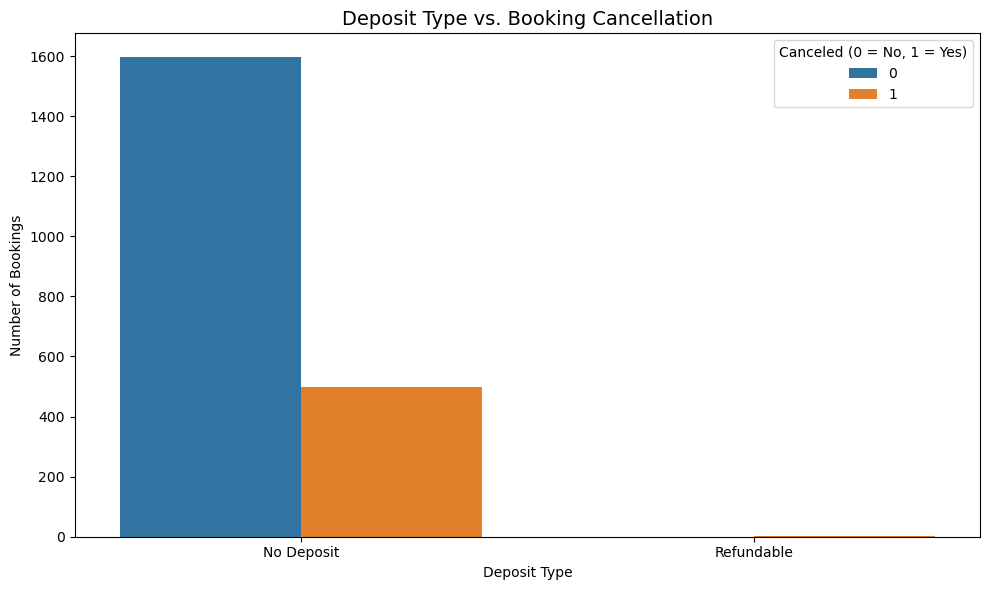

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only numerical columns for the correlation heatmap
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap to see the relationship between 'is_canceled' and other numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

# Analyze specific factors like lead time and deposit type with cancellation rates
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title('Lead Time vs. Booking Cancellation', fontsize=14)
plt.xlabel('Booking Canceled (0 = No, 1 = Yes)')
plt.ylabel('Lead Time (Days)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='deposit_type', hue='is_canceled')
plt.title('Deposit Type vs. Booking Cancellation', fontsize=14)
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

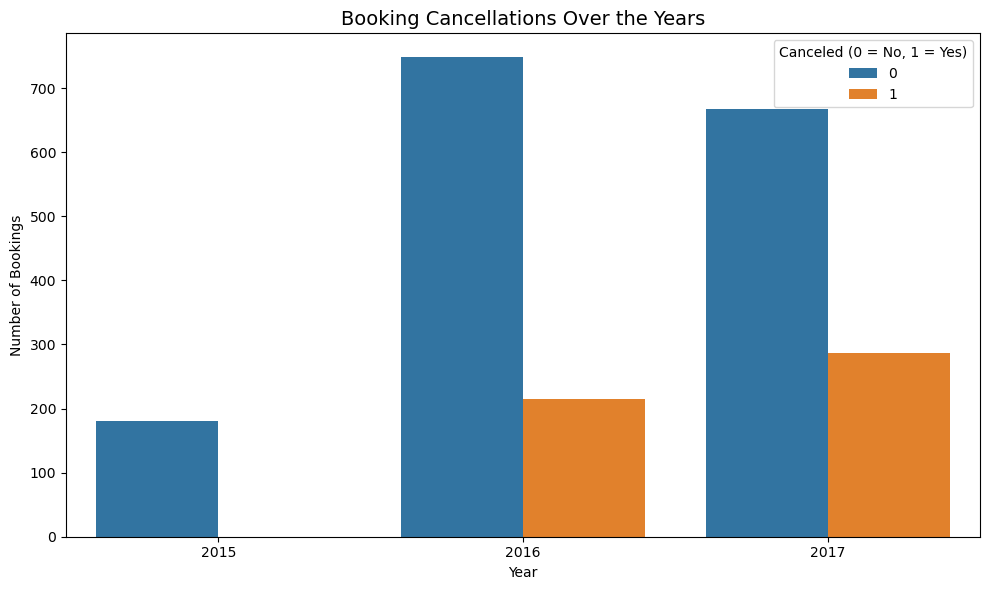

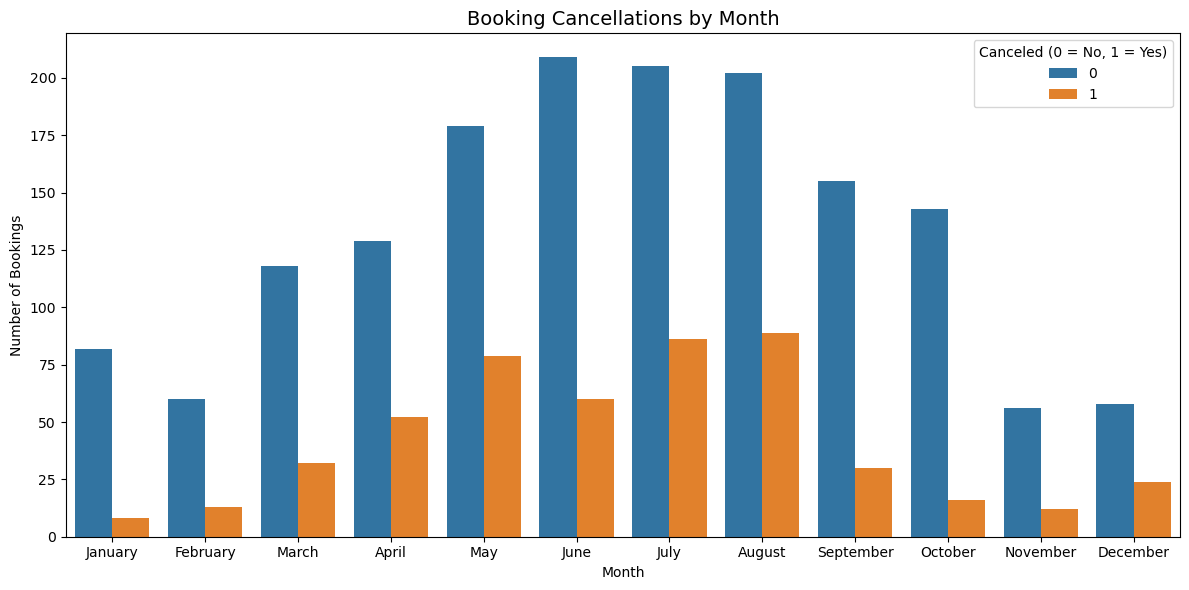

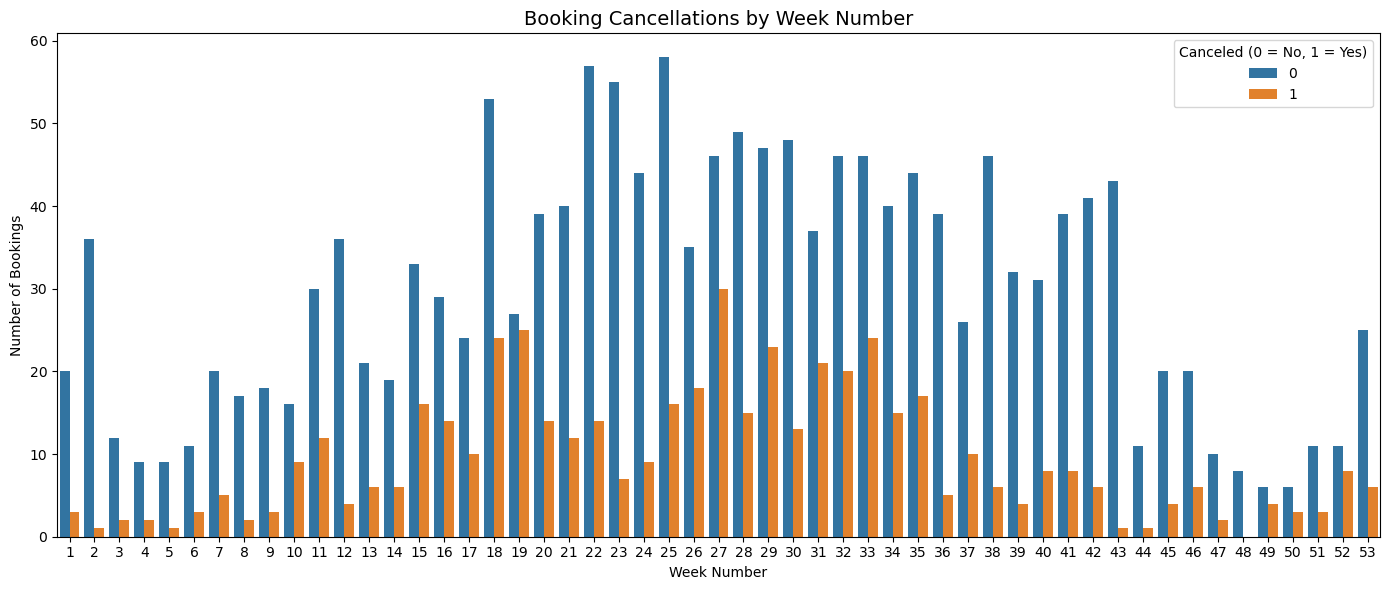

In [15]:
# Plotting cancellation trends over the years
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')
plt.title('Booking Cancellations Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

# Plotting cancellation trends by month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_date_month', hue='is_canceled', order=['January', 'February', 'March', 'April', 'May', 'June', 
                                                                        'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Booking Cancellations by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

# Plotting cancellation trends by week number
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='arrival_date_week_number', hue='is_canceled')
plt.title('Booking Cancellations by Week Number', fontsize=14)
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

Accuracy: 0.7555555555555555
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       479
           1       0.00      0.00      0.00       151

    accuracy                           0.76       630
   macro avg       0.38      0.50      0.43       630
weighted avg       0.58      0.76      0.65       630



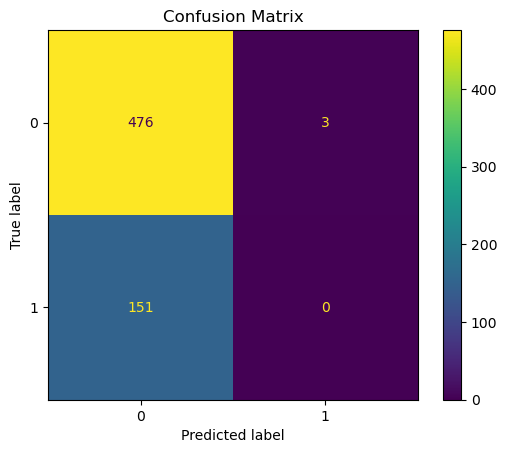

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset (assuming it's already loaded into df)
# df = pd.read_csv(r"C:\Users\91994\Downloads\DS1_C5_S5_Hotel Dataset.csv")

# Selecting relevant features for the model
features = ['lead_time', 'previous_cancellations', 'deposit_type']
df['deposit_type'] = df['deposit_type'].astype('category').cat.codes  # Convert categorical to numerical codes

X = df[features]  # Features
y = df['is_canceled']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualization of the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Ensure confusion_matrix is defined
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [82]:
# Task 4(i)

In [136]:
# Convert 'reservation_status_date' to datetime with the correct format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%Y', errors='coerce')

# Check for any invalid dates after conversion
invalid_dates = df['reservation_status_date'].isnull().sum()
if invalid_dates > 0:
    print(f"Warning: {invalid_dates} invalid date(s) found and coerced to NaT.")


In [132]:
# Create 'day_of_week' column from 'reservation_status_date'
df['day_of_week'] = df['reservation_status_date'].dt.day_name()

# Check the first few rows to verify
print(df.head())


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0         68               2015               July   
1  Resort Hotel            0         14               2015               July   
2  Resort Hotel            0         10               2015               July   
3  Resort Hotel            0          9               2015               July   
4  Resort Hotel            0         51               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          2   
2                        27                          3   
3                        27                          3   
4                        28                          6   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  company  \
0                        0                     4       2  ...  240.0      NaN   
1 

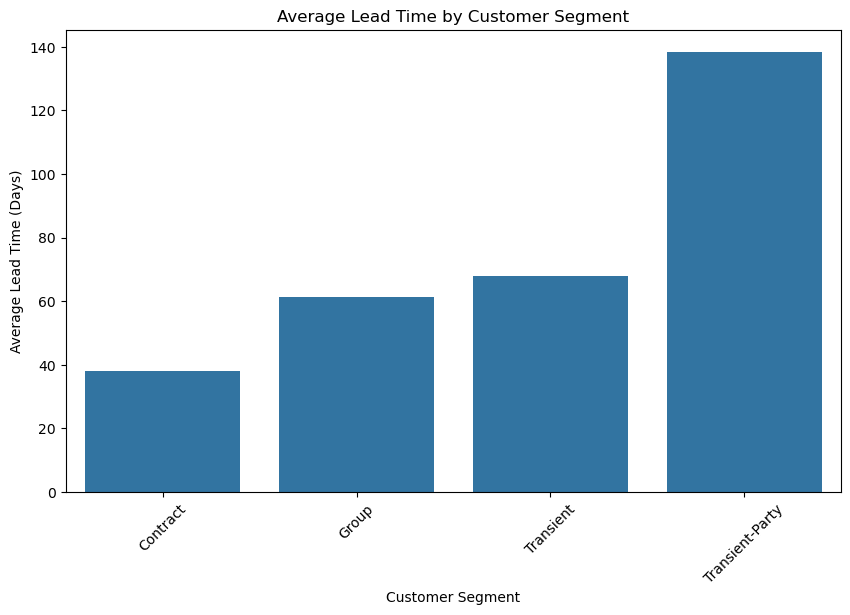

In [13]:
# Lead Time Analysis
# Group by customer segment (e.g., customer type) and calculate average lead time
lead_time_analysis = df.groupby('customer_type')['lead_time'].mean().reset_index()

# Plot lead time by customer segment
plt.figure(figsize=(10, 6))
sns.barplot(data=lead_time_analysis, x='customer_type', y='lead_time')
plt.title('Average Lead Time by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Lead Time (Days)')
plt.xticks(rotation=45)
plt.show()

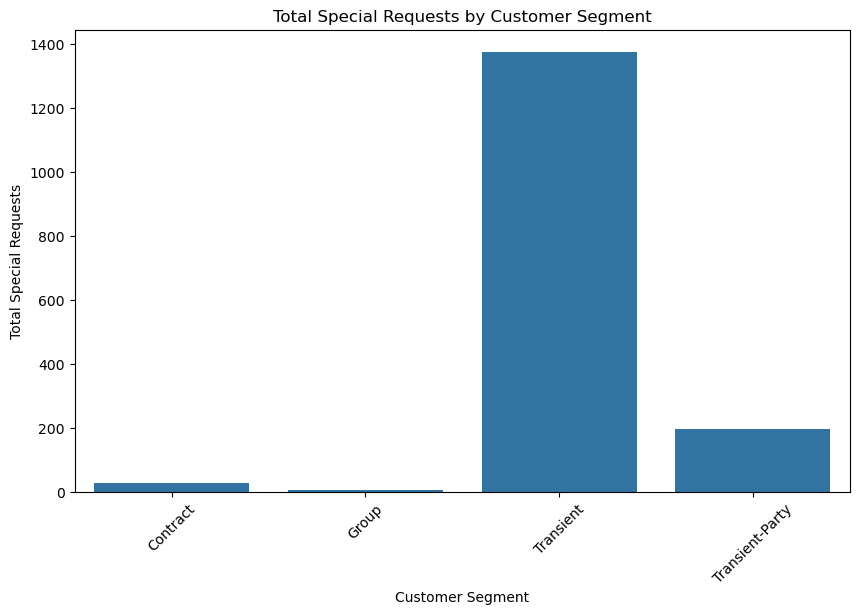

In [140]:
# Special Requests Analysis
# Group by customer segment and calculate total special requests
special_requests_analysis = df.groupby('customer_type')['total_of_special_requests'].sum().reset_index()

# Plot special requests by customer segment
plt.figure(figsize=(10, 6))
sns.barplot(data=special_requests_analysis, x='customer_type', y='total_of_special_requests')
plt.title('Total Special Requests by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Special Requests')
plt.xticks(rotation=45)
plt.show()


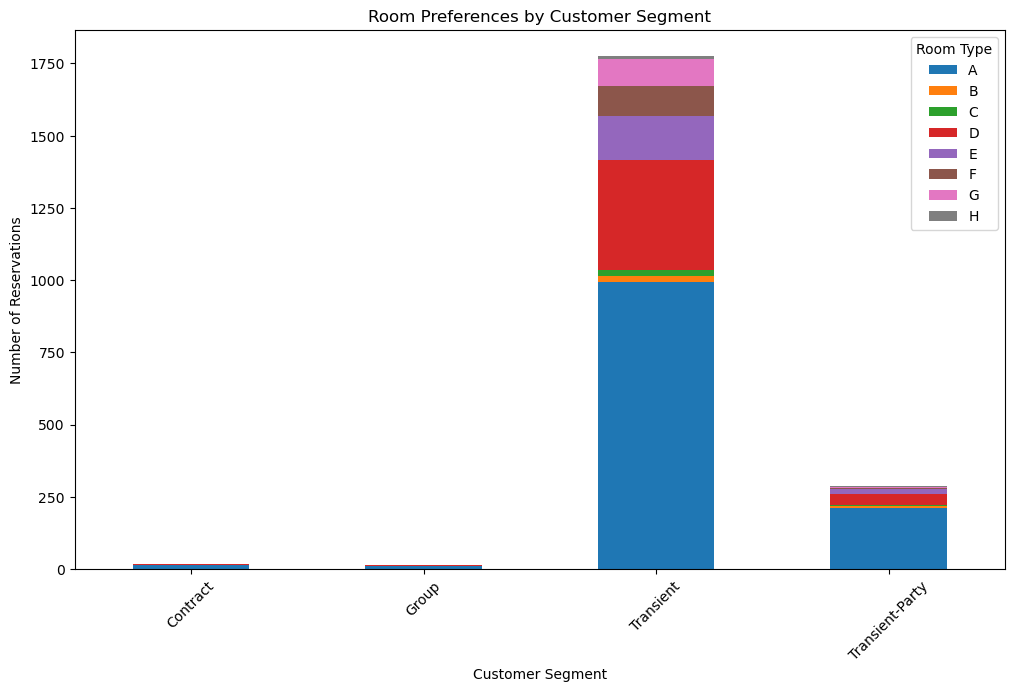

In [144]:
# Room Preferences Analysis
# Count room preferences by customer segment
room_preference_analysis = df.groupby(['customer_type', 'reserved_room_type']).size().unstack()

# Plot room preferences
room_preference_analysis.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Room Preferences by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()


In [146]:
# Task 4(ii)

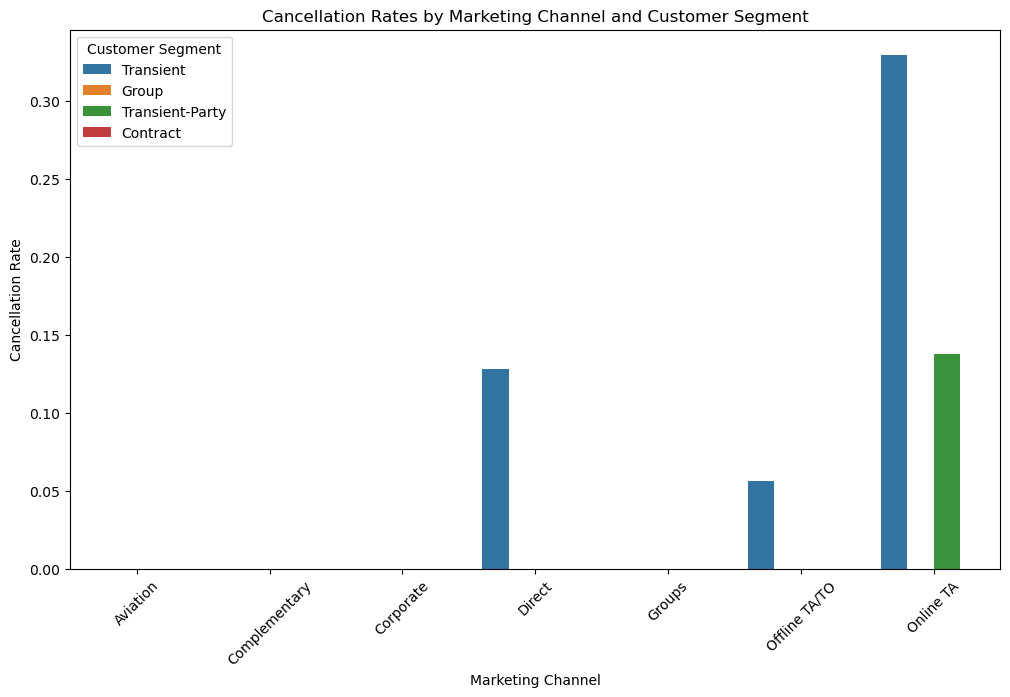

In [148]:
# Group by marketing channel and customer segment, calculating bookings and cancellations
channel_effectiveness = df.groupby(['market_segment', 'customer_type']).agg(
    total_bookings=('is_canceled', 'count'),
    total_cancellations=('is_canceled', 'sum')
).reset_index()

# Calculate cancellation rates
channel_effectiveness['cancellation_rate'] = channel_effectiveness['total_cancellations'] / channel_effectiveness['total_bookings']

# Plot cancellation rates by marketing channel
plt.figure(figsize=(12, 7))
sns.barplot(data=channel_effectiveness, x='market_segment', y='cancellation_rate', hue='customer_type')
plt.title('Cancellation Rates by Marketing Channel and Customer Segment')
plt.xlabel('Marketing Channel')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.show()


In [150]:
# Task 4(iii)

     customer_type  avg_previous_cancellations  avg_lead_time  \
0         Contract                         0.0      38.157895   
1            Group                         0.0      61.333333   
2        Transient                         0.0      67.893078   
3  Transient-Party                         0.0     138.384615   

   total_special_requests  
0                      27  
1                       6  
2                    1375  
3                     196  


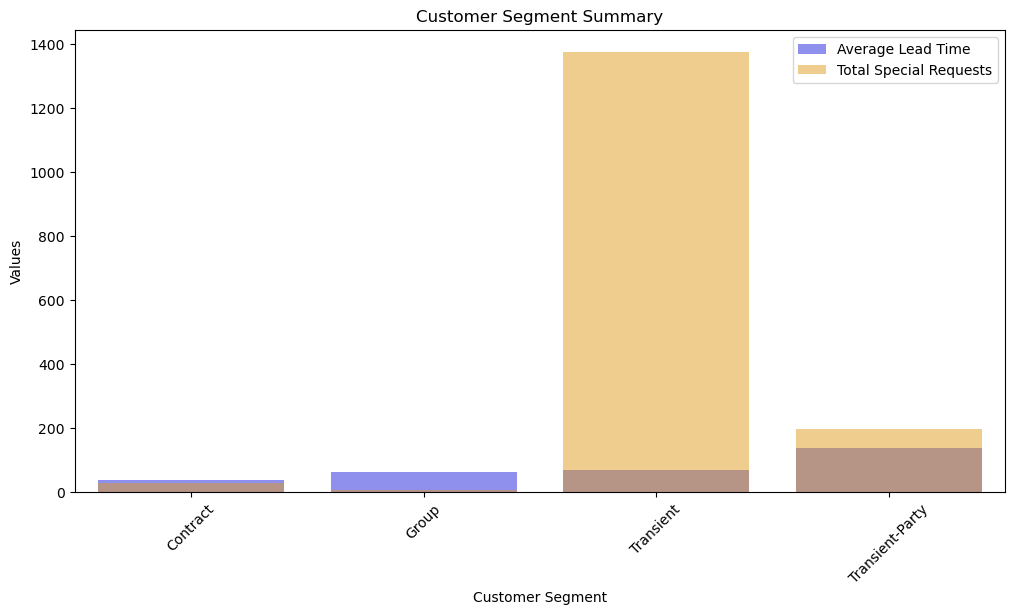

In [152]:
# Summarize key traits by customer segment
segment_summary = df.groupby('customer_type').agg(
    avg_previous_cancellations=('previous_cancellations', 'mean'),
    avg_lead_time=('lead_time', 'mean'),
    total_special_requests=('total_of_special_requests', 'sum')
).reset_index()

print(segment_summary)

# Plotting average lead time and special requests
plt.figure(figsize=(12, 6))
sns.barplot(data=segment_summary, x='customer_type', y='avg_lead_time', color='blue', alpha=0.5, label='Average Lead Time')
sns.barplot(data=segment_summary, x='customer_type', y='total_special_requests', color='orange', alpha=0.5, label='Total Special Requests')
plt.title('Customer Segment Summary')
plt.xlabel('Customer Segment')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [154]:
# Task 5(i)

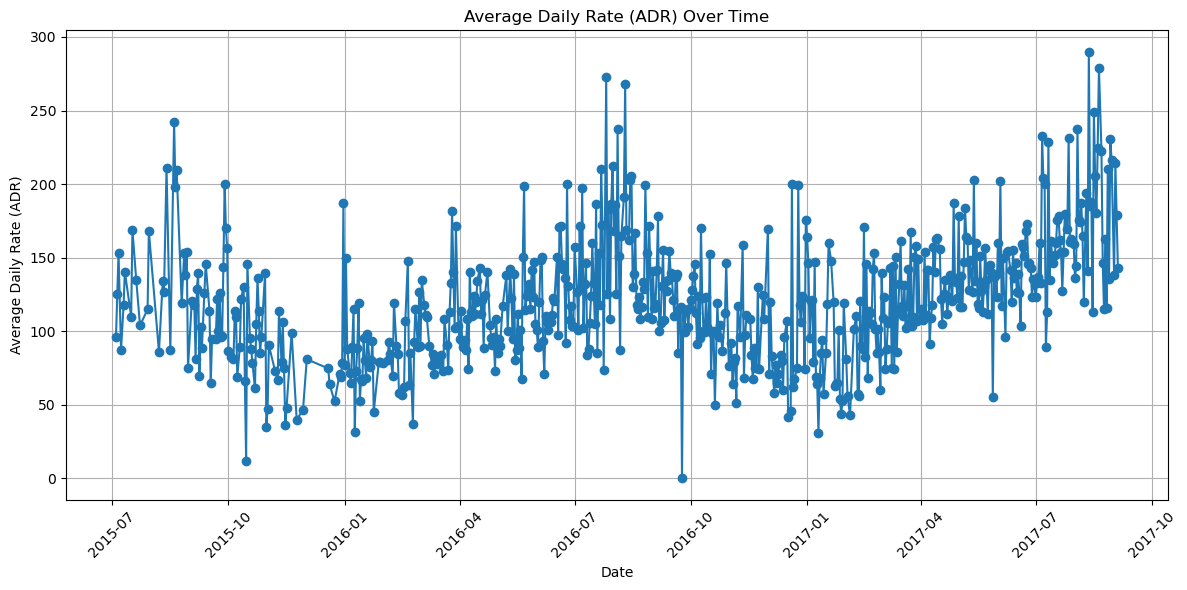

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('DS1_C5_S5_Hotel Dataset.csv')

# Convert 'reservation_status_date' to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%Y', errors='coerce')

# Group by reservation date and calculate average ADR
adr_over_time = df.groupby('reservation_status_date')['adr'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(adr_over_time['reservation_status_date'], adr_over_time['adr'], marker='o', linestyle='-')
plt.title('Average Daily Rate (ADR) Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [158]:
# Task 5(ii)

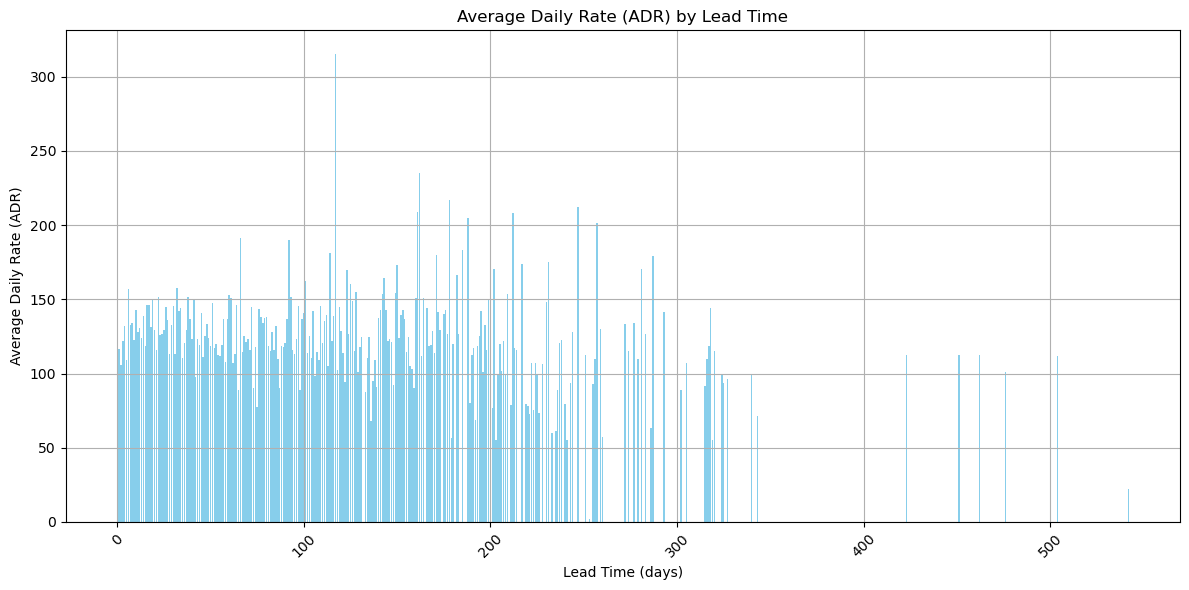

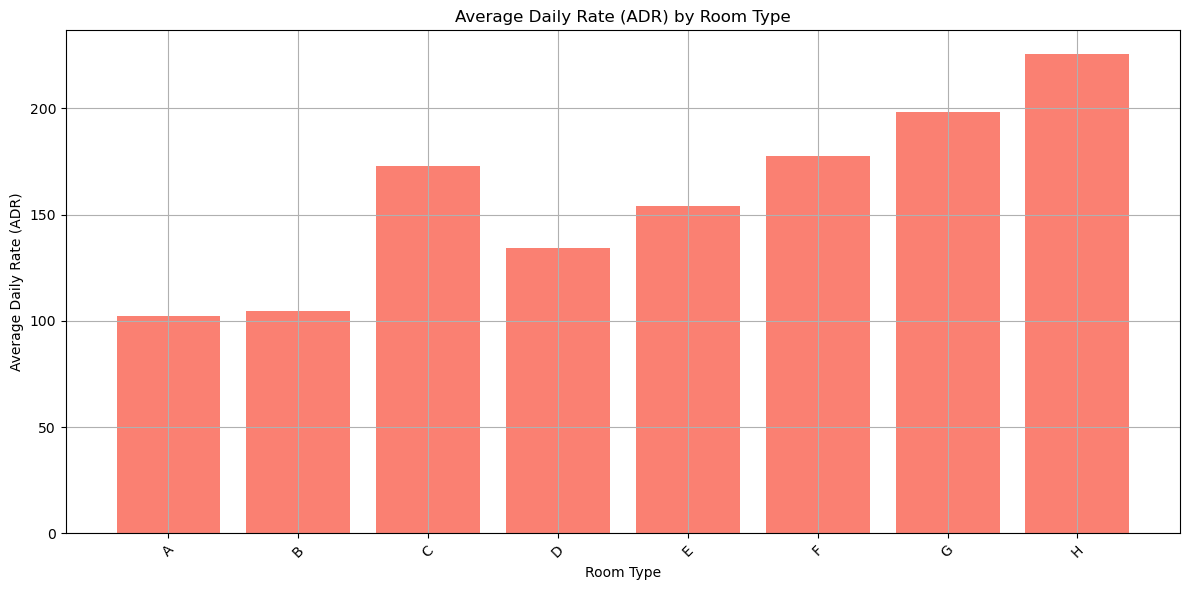

In [160]:
# Group by lead_time and calculate average ADR
adr_by_lead_time = df.groupby('lead_time')['adr'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(adr_by_lead_time['lead_time'], adr_by_lead_time['adr'], color='skyblue')
plt.title('Average Daily Rate (ADR) by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# You can also explore ADR by room type
adr_by_room_type = df.groupby('reserved_room_type')['adr'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(adr_by_room_type['reserved_room_type'], adr_by_room_type['adr'], color='salmon')
plt.title('Average Daily Rate (ADR) by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [164]:
# Task 5(iii)

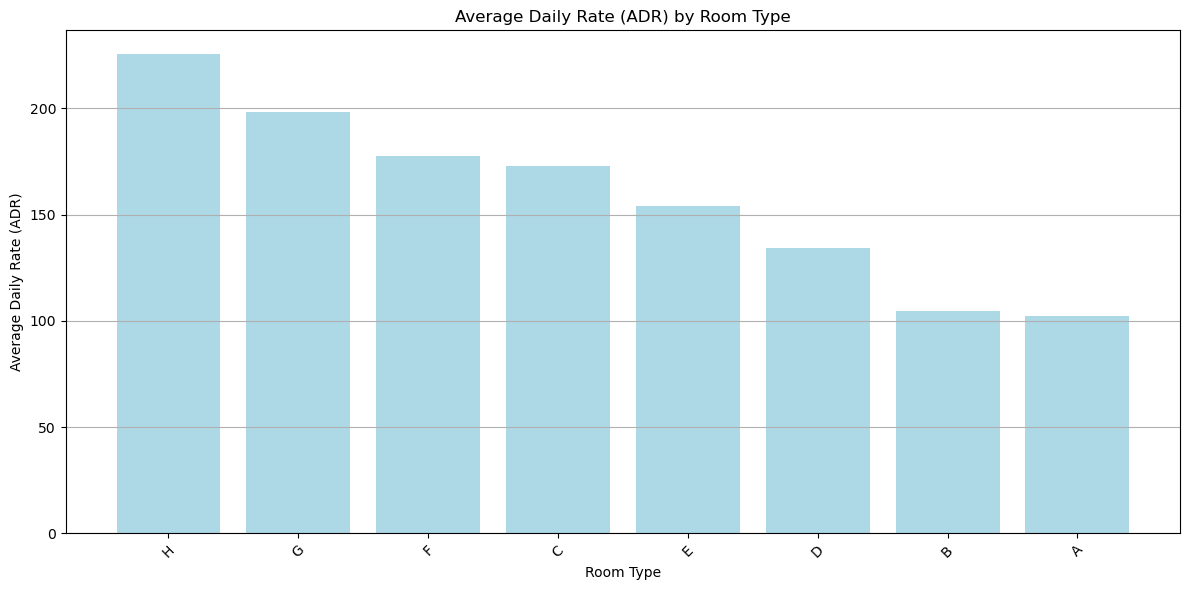

  reserved_room_type         adr
7                  H  225.505714
6                  G  198.491735
5                  F  177.835714
2                  C  172.684348
4                  E  154.054940
3                  D  134.109882
1                  B  104.705000
0                  A  102.282482


In [166]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('DS1_C5_S5_Hotel Dataset.csv')

# Convert 'reservation_status_date' to datetime (if needed)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%Y', errors='coerce')

# Group by room type and calculate average ADR
adr_by_room_type = df.groupby('reserved_room_type')['adr'].mean().reset_index()

# Sort the room types by ADR in descending order
adr_by_room_type = adr_by_room_type.sort_values(by='adr', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(adr_by_room_type['reserved_room_type'], adr_by_room_type['adr'], color='lightblue')
plt.title('Average Daily Rate (ADR) by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display the ADR by room type
print(adr_by_room_type)


In [172]:
# Task 6(i)

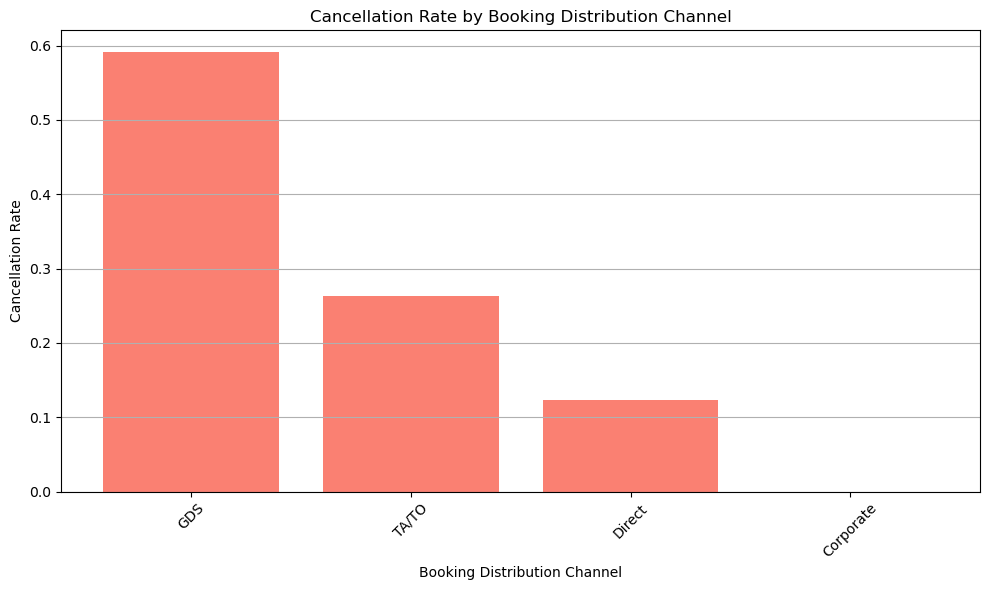

  distribution_channel  is_canceled
2                  GDS     0.590909
3                TA/TO     0.263470
1               Direct     0.122507
0            Corporate     0.000000


In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('DS1_C5_S5_Hotel Dataset.csv')

# Calculate the cancellation rate by distribution channel
cancellation_rate = df.groupby('distribution_channel')['is_canceled'].mean().reset_index()

# Sort by cancellation rate
cancellation_rate = cancellation_rate.sort_values(by='is_canceled', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(cancellation_rate['distribution_channel'], cancellation_rate['is_canceled'], color='salmon')
plt.title('Cancellation Rate by Booking Distribution Channel')
plt.xlabel('Booking Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display the cancellation rates
print(cancellation_rate)


In [170]:
# Task 6(ii)

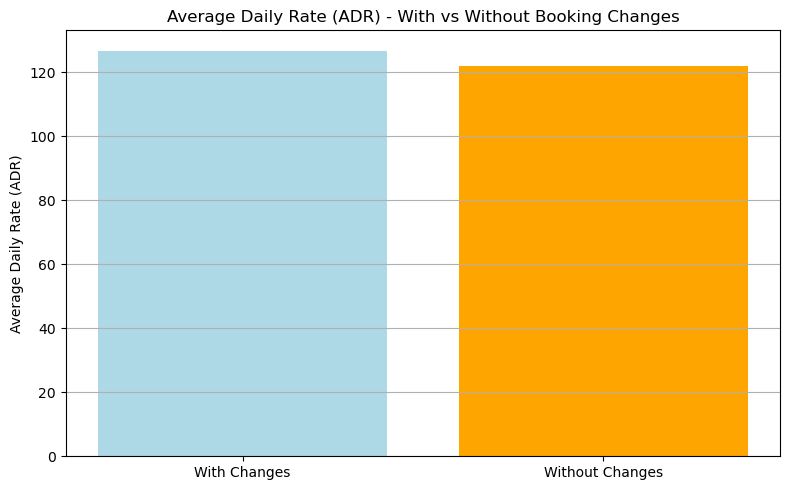

ADR with changes: 126.77901826484018
ADR without changes: 121.9924894514768


In [176]:
# Calculate the average ADR for bookings with and without changes
adr_with_changes = df[df['booking_changes'] > 0]['adr'].mean()
adr_without_changes = df[df['booking_changes'] == 0]['adr'].mean()

# Prepare data for plotting
adr_changes = [adr_with_changes, adr_without_changes]
labels = ['With Changes', 'Without Changes']

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(labels, adr_changes, color=['lightblue', 'orange'])
plt.title('Average Daily Rate (ADR) - With vs Without Booking Changes')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display the average ADRs
print(f'ADR with changes: {adr_with_changes}')
print(f'ADR without changes: {adr_without_changes}')


In [178]:
# Task 6(iii)

Correlation between waiting list duration and cancellation likelihood: -0.06


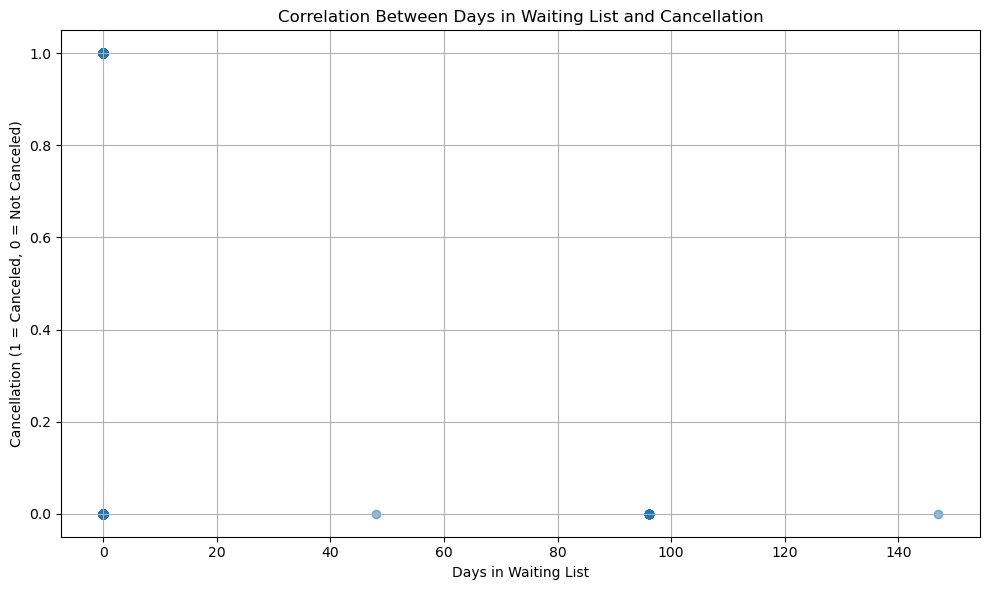

In [180]:
# Calculate the correlation between 'days_in_waiting_list' and 'is_canceled'
correlation = df['days_in_waiting_list'].corr(df['is_canceled'])

# Print the correlation value
print(f'Correlation between waiting list duration and cancellation likelihood: {correlation:.2f}')

# Plotting the correlation
plt.figure(figsize=(10, 6))
plt.scatter(df['days_in_waiting_list'], df['is_canceled'], alpha=0.5)
plt.title('Correlation Between Days in Waiting List and Cancellation')
plt.xlabel('Days in Waiting List')
plt.ylabel('Cancellation (1 = Canceled, 0 = Not Canceled)')
plt.grid()
plt.tight_layout()
plt.show()


In [182]:
# Task 7(i)

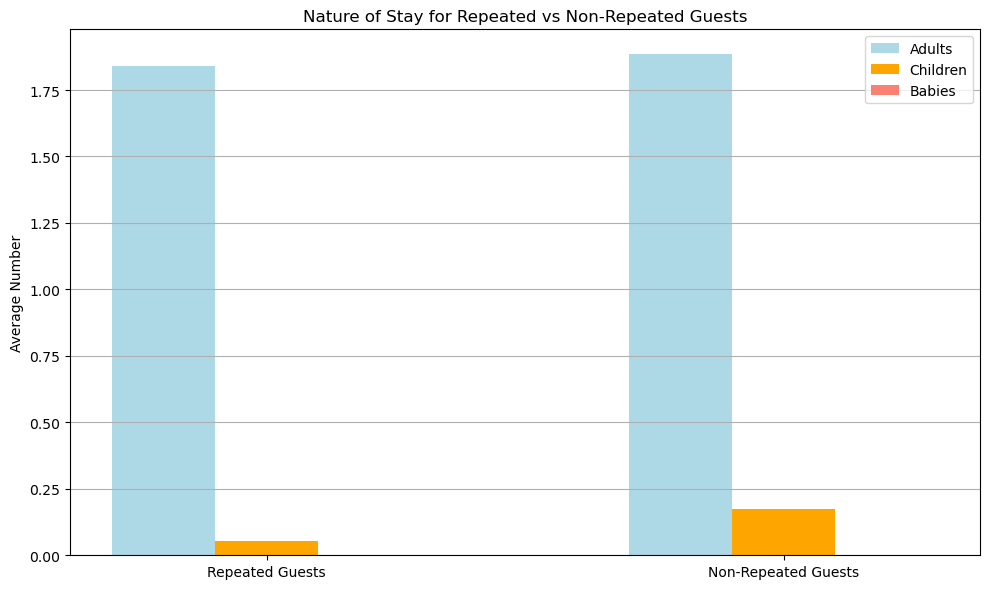

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('DS1_C5_S5_Hotel Dataset.csv')

# Separate repeated and non-repeated guests
repeated_guests = df[df['is_repeated_guest'] == 1]
non_repeated_guests = df[df['is_repeated_guest'] == 0]

# Calculate the average nature of stay characteristics
avg_repeated = repeated_guests[['adults', 'children', 'babies']].mean()
avg_non_repeated = non_repeated_guests[['adults', 'children', 'babies']].mean()

# Prepare data for plotting
labels = ['Repeated Guests', 'Non-Repeated Guests']
adults = [avg_repeated['adults'], avg_non_repeated['adults']]
children = [avg_repeated['children'], avg_non_repeated['children']]
babies = [avg_repeated['babies'], avg_non_repeated['babies']]

# Plotting
x = range(len(labels))
plt.figure(figsize=(10, 6))
plt.bar(x, adults, width=0.2, label='Adults', color='lightblue', align='center')
plt.bar([p + 0.2 for p in x], children, width=0.2, label='Children', color='orange', align='center')
plt.bar([p + 0.4 for p in x], babies, width=0.2, label='Babies', color='salmon', align='center')

plt.title('Nature of Stay for Repeated vs Non-Repeated Guests')
plt.xticks([p + 0.2 for p in x], labels)
plt.ylabel('Average Number')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [185]:
# Task 7(ii)

<Figure size 800x500 with 0 Axes>

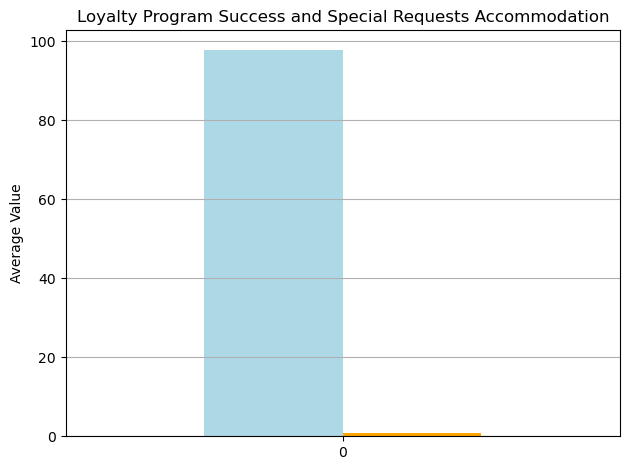

Average ADR for repeated guests: 97.88578947368421
Average special requests for repeated guests: 0.7368421052631579


In [190]:
# Calculate the success of loyalty programs (as average ADR for repeated guests)
avg_adr_repeated = repeated_guests['adr'].mean()

# Calculate the average special requests for repeated guests
avg_special_requests_repeated = repeated_guests['total_of_special_requests'].mean()

# Prepare data for plotting
data = {
    'Average ADR': [avg_adr_repeated],
    'Average Special Requests': [avg_special_requests_repeated]
}

df_loyalty = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 5))
df_loyalty.plot(kind='bar', color=['lightblue', 'orange'], legend=False)
plt.title('Loyalty Program Success and Special Requests Accommodation')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display the results
print(f'Average ADR for repeated guests: {avg_adr_repeated}')
print(f'Average special requests for repeated guests: {avg_special_requests_repeated}')


In [192]:
# Task 7(iii)

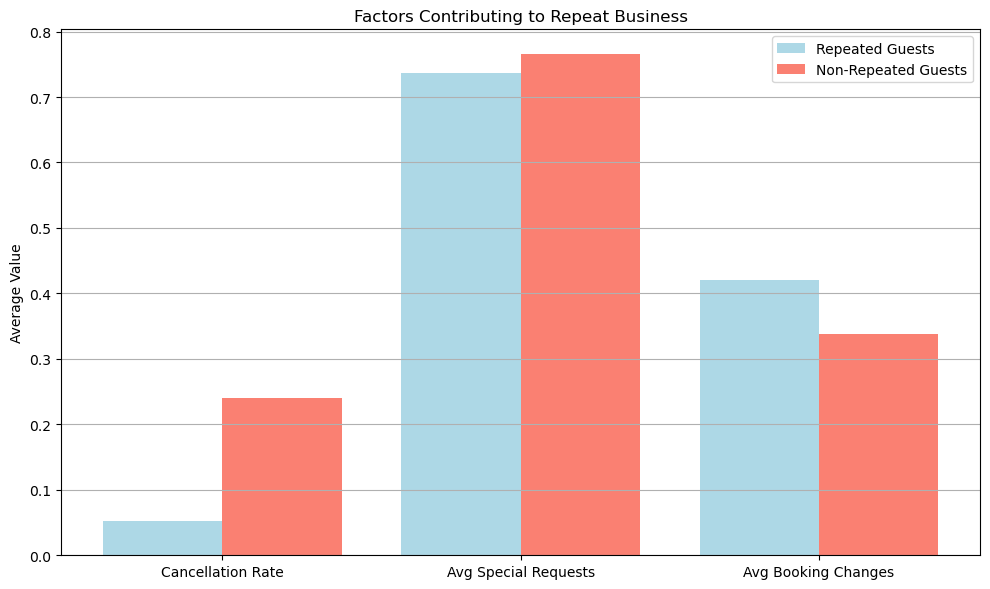

In [194]:
# Analyze cancellation rate for repeated and non-repeated guests
cancellation_rate_repeated = repeated_guests['is_canceled'].mean()
cancellation_rate_non_repeated = non_repeated_guests['is_canceled'].mean()

# Calculate average special requests and booking changes for both groups
avg_special_requests_repeated = repeated_guests['total_of_special_requests'].mean()
avg_booking_changes_repeated = repeated_guests['booking_changes'].mean()

avg_special_requests_non_repeated = non_repeated_guests['total_of_special_requests'].mean()
avg_booking_changes_non_repeated = non_repeated_guests['booking_changes'].mean()

# Prepare data for plotting
factors = ['Cancellation Rate', 'Avg Special Requests', 'Avg Booking Changes']
values_repeated = [cancellation_rate_repeated, avg_special_requests_repeated, avg_booking_changes_repeated]
values_non_repeated = [cancellation_rate_non_repeated, avg_special_requests_non_repeated, avg_booking_changes_non_repeated]

# Plotting
x = range(len(factors))
plt.figure(figsize=(10, 6))
plt.bar(x, values_repeated, width=0.4, label='Repeated Guests', color='lightblue', align='center')
plt.bar([p + 0.4 for p in x], values_non_repeated, width=0.4, label='Non-Repeated Guests', color='salmon', align='center')

plt.title('Factors Contributing to Repeat Business')
plt.xticks([p + 0.2 for p in x], factors)
plt.ylabel('Average Value')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [19]:
# Sprint 6

In [21]:
# Task 1

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('DS1_C5_S5_Hotel Dataset.csv')

# Check the distribution of special requests
if 'Special_Requests' in df.columns:
    # Count the number of requests
    special_request_distribution = df['Special_Requests'].value_counts()
    print("Distribution of Special Requests:\n", special_request_distribution)

    # Plot the distribution of special requests
    plt.figure(figsize=(8, 6))
    special_request_distribution.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Special Requests')
    plt.xlabel('Number of Special Requests')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Special_Requests' not found in the dataset.")


Column 'Special_Requests' not found in the dataset.


In [25]:
# Check if 'ADR' and 'Special_Requests' columns exist
if 'ADR' in df.columns and 'Special_Requests' in df.columns:
    # Analyze correlation between ADR and Special Requests
    correlation = df[['ADR', 'Special_Requests']].corr()
    print("Correlation between ADR and Special Requests:\n", correlation)

    # Scatter plot to visualize the relationship
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Special_Requests'], df['ADR'], color='purple', alpha=0.6)
    plt.title('Relation Between Special Requests and ADR')
    plt.xlabel('Number of Special Requests')
    plt.ylabel('Average Daily Rate (ADR)')
    plt.show()
else:
    print("Columns 'ADR' or 'Special_Requests' not found in the dataset.")

# Analyze customer preferences based on room type (if available)
if 'Room_Type' in df.columns:
    room_type_preference = df.groupby('Room_Type')['Special_Requests'].mean()
    print("\nCustomer Preferences for Room Types (Avg. Special Requests):\n", room_type_preference)

    # Visualize room type preferences
    plt.figure(figsize=(10, 6))
    room_type_preference.plot(kind='bar', color='orange')
    plt.title('Average Special Requests by Room Type')
    plt.xlabel('Room Type')
    plt.ylabel('Average Number of Special Requests')
    plt.show()
else:
    print("Column 'Room_Type' not found in the dataset.")


Columns 'ADR' or 'Special_Requests' not found in the dataset.
Column 'Room_Type' not found in the dataset.


In [27]:
# Task 2(1)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('DS1_C5_S5_Hotel Dataset.csv')

# Analyze marketing channels' contribution to successful bookings
if 'Marketing_Channel' in df.columns and 'Market_Segment' in df.columns:
    # Assuming 'Is_Booking_Successful' is a column that marks a booking as successful (1 for yes, 0 for no)
    marketing_contribution = df.groupby('Marketing_Channel')['Is_Booking_Successful'].sum().sort_values(ascending=False)
    market_segment_contribution = df.groupby('Market_Segment')['Is_Booking_Successful'].sum().sort_values(ascending=False)

    print("Marketing Channels Contribution to Successful Bookings:\n", marketing_contribution)
    print("\nMarket Segment Contribution to Successful Bookings:\n", market_segment_contribution)

    # Plot marketing channels
    plt.figure(figsize=(10, 6))
    marketing_contribution.plot(kind='bar', color='lightgreen')
    plt.title('Marketing Channels Contribution to Successful Bookings')
    plt.xlabel('Marketing Channel')
    plt.ylabel('Successful Bookings')
    plt.show()

    # Plot market segments
    plt.figure(figsize=(10, 6))
    market_segment_contribution.plot(kind='bar', color='lightblue')
    plt.title('Market Segment Contribution to Successful Bookings')
    plt.xlabel('Market Segment')
    plt.ylabel('Successful Bookings')
    plt.show()
else:
    print("Columns 'Marketing_Channel' or 'Market_Segment' or 'Is_Booking_Successful' not found in the dataset.")


Columns 'Marketing_Channel' or 'Market_Segment' or 'Is_Booking_Successful' not found in the dataset.


In [31]:
# Task 2(2)

In [33]:
# Checking correlation between amenities/services and ADR
if 'ADR' in df.columns:
    amenities_columns = ['WiFi', 'Parking', 'Pool', 'Gym', 'Spa']  # List of amenities, replace with actual columns in your dataset
    amenity_impact = df[amenities_columns + ['ADR']].corr()['ADR'].sort_values(ascending=False)

    print("Impact of Amenities on ADR:\n", amenity_impact)

    # Plot the impact
    plt.figure(figsize=(10, 6))
    amenity_impact.drop('ADR').plot(kind='bar', color='lightcoral')
    plt.title('Impact of Amenities on ADR')
    plt.xlabel('Amenities/Services')
    plt.ylabel('Correlation with ADR')
    plt.show()
else:
    print("Column 'ADR' not found in the dataset.")


Column 'ADR' not found in the dataset.


In [35]:
# Task 2(3)

In [37]:
# Distribution of bookings across distribution channels
if 'Distribution_Channel' in df.columns:
    distribution_channel_distribution = df['Distribution_Channel'].value_counts()
    print("Distribution of Bookings Across Distribution Channels:\n", distribution_channel_distribution)

    # Plot the distribution of bookings
    plt.figure(figsize=(10, 6))
    distribution_channel_distribution.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Bookings Across Distribution Channels')
    plt.xlabel('Distribution Channel')
    plt.ylabel('Number of Bookings')
    plt.show()
else:
    print("Column 'Distribution_Channel' not found in the dataset.")


Column 'Distribution_Channel' not found in the dataset.
